# Setup and useful functions

In [1]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

from matplotlib import pyplot as plt
from skimage.transform import resize
from sklearn import manifold
import numpy as np
import glob
import cv2

from sklearn.manifold import MDS
import seaborn as sns
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [9]:
filelist = glob.glob('generative_models/augmented/*.png')
x = []
for fname in filelist:
    im = cv2.imread(fname, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Binarization
    ret, th = cv2.threshold(blurred,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    x.append(th)

x = np.array(x)

error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x7123906f::Set<1,-1,-1>,struct cv::impl::A0x7123906f::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [4]:
def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=False, num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.
    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    plt.suptitle("Generated images")
    _ = plt.show()


show_image_list(x[30:40], list_cmaps=['gray']*10, num_cols=5)

AssertionError: 

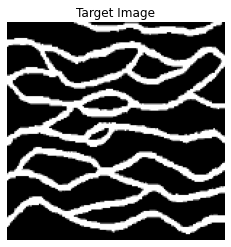

In [5]:
filelist_target = glob.glob('TI/*.png')
im = cv2.imread(r'C:\Users\Gustavo Scholze\gan-for-mps\TI\strebelle.png', cv2.COLOR_BGR2GRAY)

# Binarization
ret, target_img = cv2.threshold(im,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Resize image
target_img = resize(target_img, (150,150))

plt.imshow(target_img, cmap='gray')
plt.title('Target Image')
plt.axis('off')
plt.show()

# Structural similarity and Mean squared error

In [6]:
mse_none = [mean_squared_error(im, target_img) for im in x]
ssim_none = [ssim(im, target_img, data_range=im.max()-im.min()) for im in x]

In [30]:
similar = ssim_none.copy()
similar.sort(reverse=True)

# Get indexes from best and worst simulations to see if it matches
top_10_images_ssim = similar[:10]
top_10_idxs_ssim = [ssim_none.index(similarity_coef) for similarity_coef in top_10_images_ssim]

bottom_10_images_ssim = similar[len(similar)-10:len(similar)]
bottom_10_idxs_ssim = [ssim_none.index(similarity_coef) for similarity_coef in bottom_10_images_ssim]


similar_mse = mse_none.copy()
similar_mse.sort(reverse=True)

# Get indexes from best and worst simulations to see if it matches
top_10_images_mse = similar_mse[:10]
top_10_idxs_mse = [mse_none.index(similarity_coef) for similarity_coef in top_10_images_mse]

bottom_10_images_mse = similar_mse[len(similar_mse)-10:len(similar_mse)]
bottom_10_idxs_mse = [mse_none.index(similarity_coef) for similarity_coef in bottom_10_images_mse]

### Structural similarity

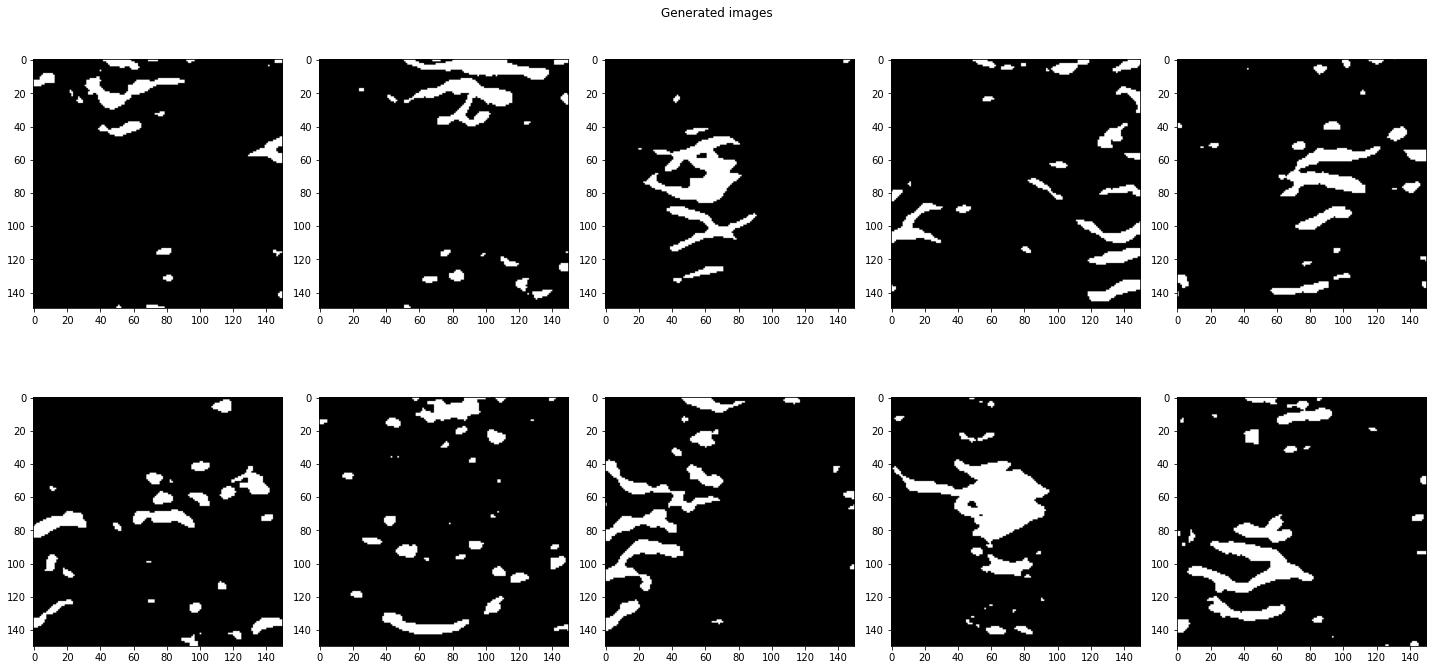

In [31]:
show_image_list(x[top_10_idxs_ssim], list_cmaps=['gray']*10, num_cols=5)

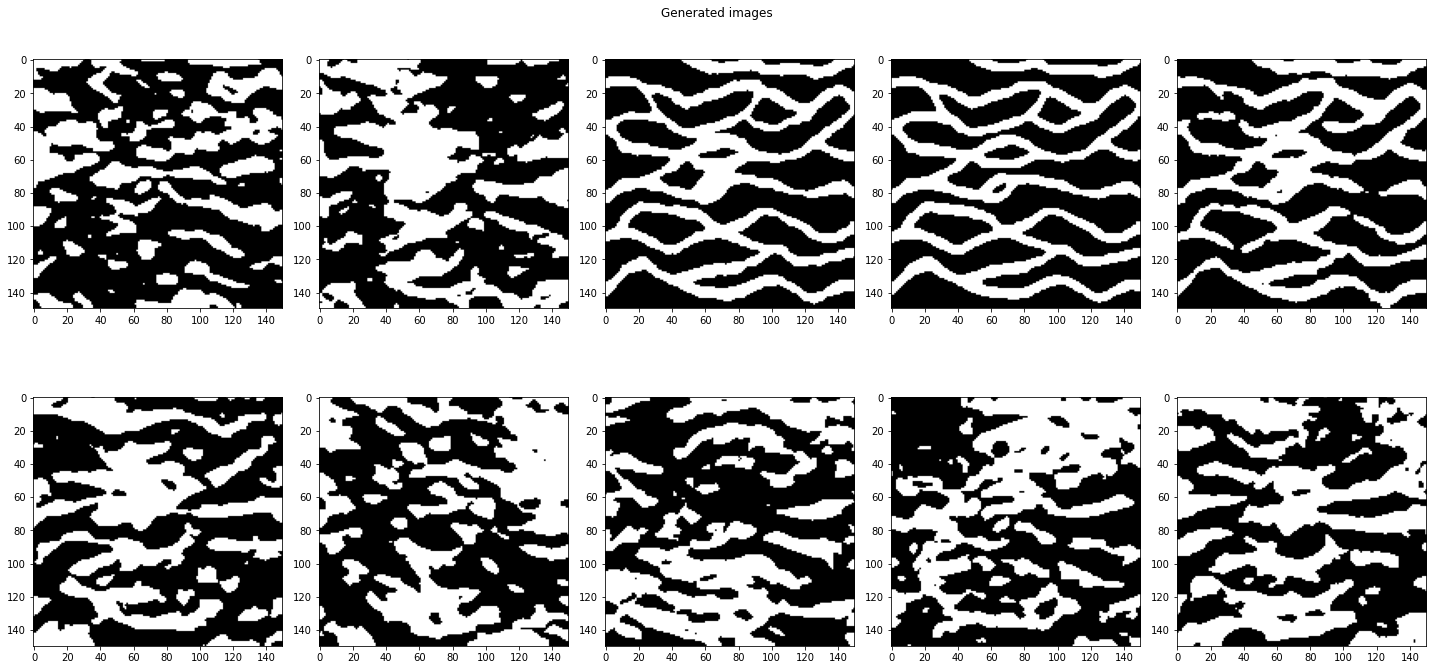

In [32]:
show_image_list(x[bottom_10_idxs_ssim], list_cmaps=['gray']*10, num_cols=5)

### Mean squared error

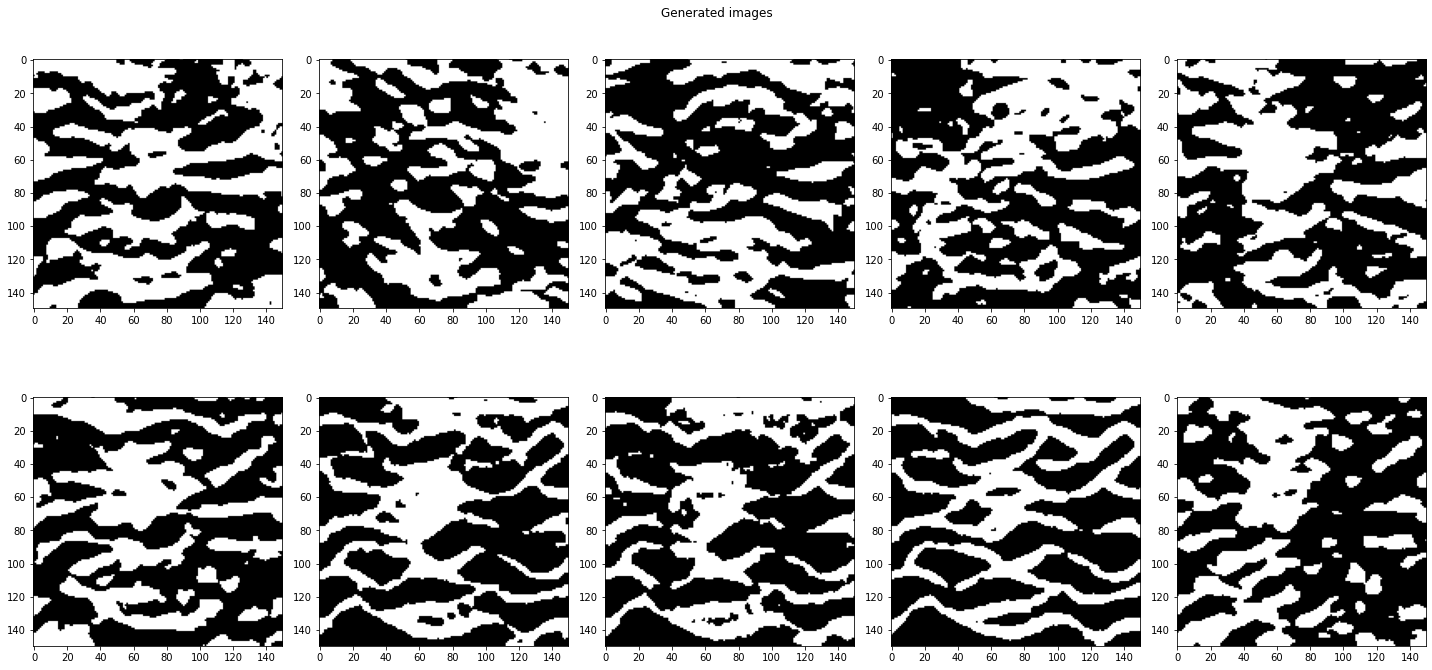

In [33]:
show_image_list(x[top_10_idxs_mse], list_cmaps=['gray']*10, num_cols=5)

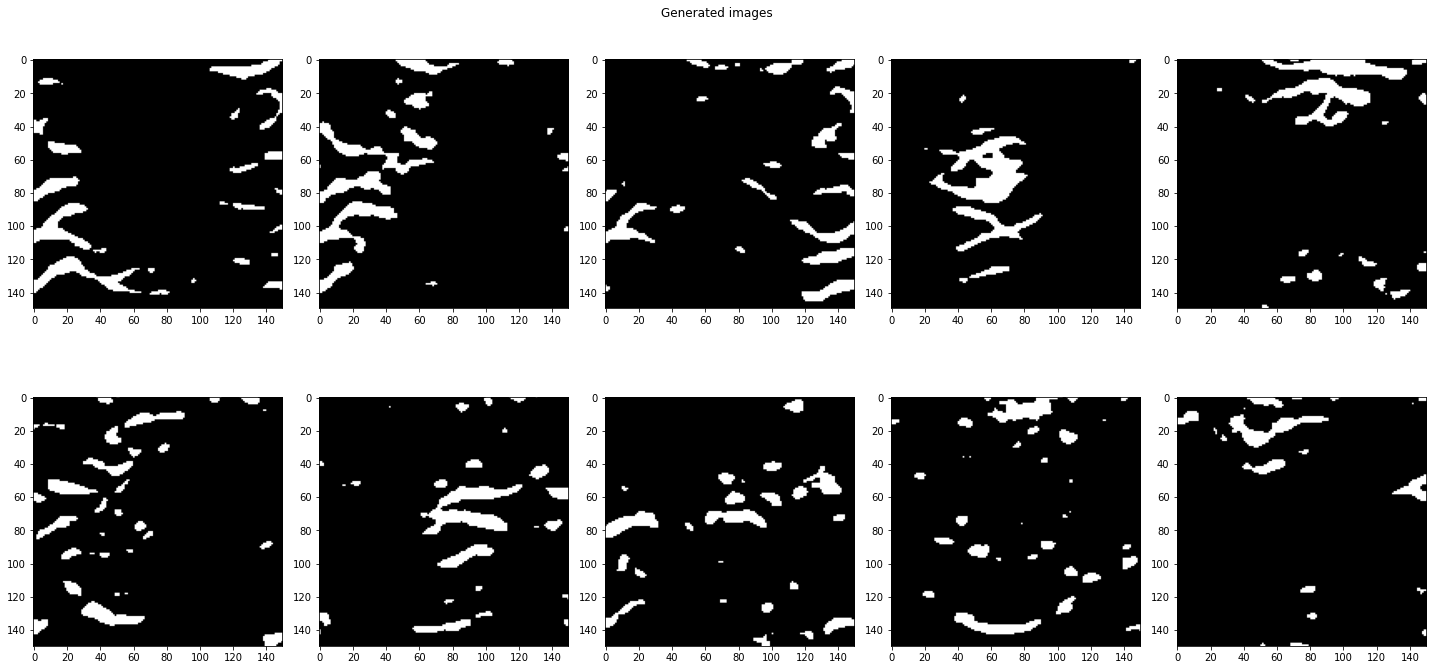

In [34]:
show_image_list(x[bottom_10_idxs_mse], list_cmaps=['gray']*10, num_cols=5)

# Multidimensional scaling

In [35]:
from PIL import Image

filelist = glob.glob('simulated/*.png')

# Looping through images and converting them
x = []
for fname in filelist:
    im = cv2.imread(fname, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Binarization
    ret, th = cv2.threshold(blurred,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    x.append(th.flatten())


In [24]:
mds = manifold.MDS(n_components=3, max_iter=100000, random_state=0)
sample=x[top_10_idxs_mse]
coords = mds.fit(sample).embedding_

print("Is stress coefficient good? ", True if mds.stress_ < 0.2 else False)
print("Stress coefficient: ", mds.stress_)
print("Number of iterations: ", mds.n_iter_)

plt.scatter(coords[:, 0], coords[:, 1], marker='x', color="black", s=50)

TypeError: list indices must be integers or slices, not list

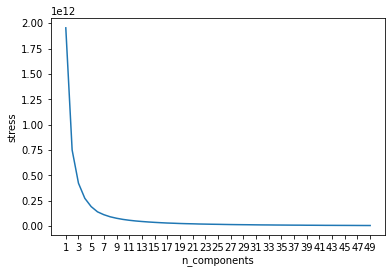

In [15]:
dist_euclid = euclidean_distances(x)

stress = []
# Max value for n_components
max_range = 50
for dim in range(1, max_range):
    # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=303258)
    # Apply MDS
    pts = mds.fit_transform(dist_euclid)
    # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()